<div style="text-align:center; color:white; padding:10pt; background-color:teal"><h1>Inferential Statistics Coded Project</h1>
    <h3>- Haraprasad Dhal</h3>
    <div>
<hr style="height:4px;border-width:0;color:gray;background-color:white">

In [1]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns  # library for visualizations

#%matplotlib inline

import scipy.stats as stats

<h2 style="text-align:center; color:white; padding:10pt; background-color:teal">Gunny bags strength case study</h2>

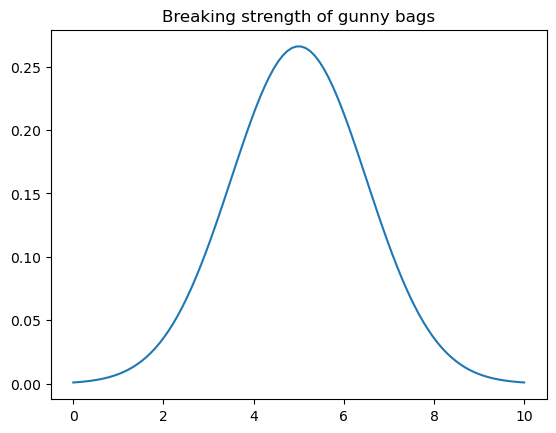

In [2]:
density=pd.DataFrame()
density['x']=np.linspace(0,10,100)
mu,sigma=5,1.5
density["pdf"] = stats.norm.pdf(density["x"], mu, sigma)

fig, ax = plt.subplots()
ax.plot(density["x"], density["pdf"]) # plot the pdf of the normal distribution
plt.title("Breaking strength of gunny bags")
plt.show()

<b>What proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm?</b>

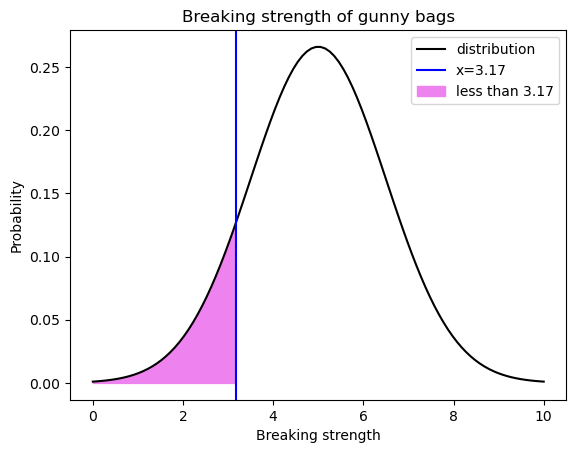

In [3]:
plt.plot(density["x"], density["pdf"],label='distribution',c='black') # plot the pdf of the normal distribution
plt.axvline(x=3.17, c="b",label='x=3.17')
x1 = np.linspace(0, 3.17, 50) 
plt.fill_between(x1, stats.norm.pdf(x1, mu, sigma), color="violet",label='less than 3.17') 
plt.xlabel("Breaking strength")
plt.ylabel("Probability") # set the y-axis label
plt.title("Breaking strength of gunny bags") # set the title
plt.legend()
# plt.savefig('2_1.png',dpi=400)
plt.show() # display the plot

In [4]:
prob_less_than_3_17 = stats.norm.cdf(3.17, mu, sigma)
print(
    "proportion of the gunny bags which have a breaking strength of less than 3.17 kg per sq cm:",
    round(prob_less_than_3_17, 4)*100,'%'
)

proportion of the gunny bags which have a breaking strength of less than 3.17 kg per sq cm: 11.12 %


<b>What proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm</b>

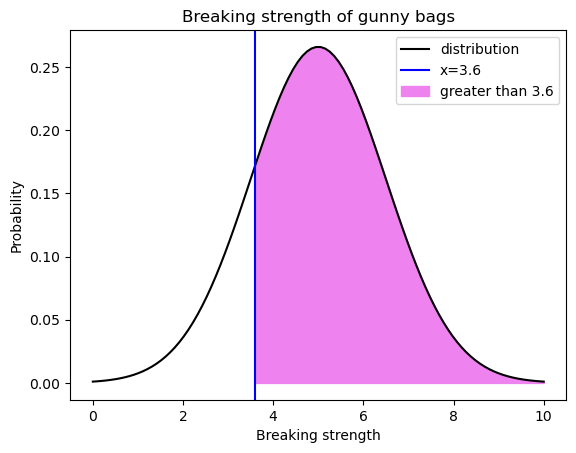

In [5]:
plt.plot(density["x"], density["pdf"],label='distribution',c='black') # plot the pdf of the normal distribution
plt.axvline(x=3.6, c="b",label='x=3.6')
x1 = np.linspace(3.6, 10, 50) 
plt.fill_between(x1, stats.norm.pdf(x1, mu, sigma), color="violet",label='greater than 3.6') 
plt.xlabel("Breaking strength")
plt.ylabel("Probability") # set the y-axis label
plt.title("Breaking strength of gunny bags") # set the title
plt.legend()
# plt.savefig('2_2.png',dpi=400)
plt.show() # display the plot

In [6]:
prob_greater_than_3_6 = 1-stats.norm.cdf(3.6, mu, sigma)
print(
    "proportion of the gunny bags which have a breaking strength of greater than 3.6 kg per sq cm:",
    round(prob_greater_than_3_6, 4)*100,'%'
)

proportion of the gunny bags which have a breaking strength of greater than 3.6 kg per sq cm: 82.47 %


<b> What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?</b>

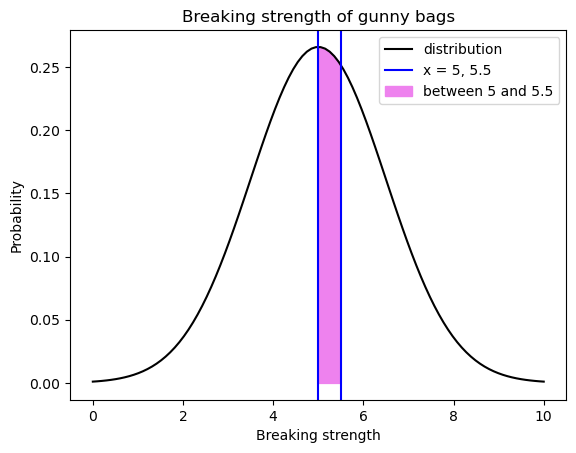

In [7]:
plt.plot(density["x"], density["pdf"],label='distribution',c='black') # plot the pdf of the normal distribution
plt.axvline(x=5, c="b")
plt.axvline(x=5.5, c="b",label='x = 5, 5.5')
x1 = np.linspace(5, 5.5, 10) 
plt.fill_between(x1, stats.norm.pdf(x1, mu, sigma), color="violet",label='between 5 and 5.5') 
plt.xlabel("Breaking strength")
plt.ylabel("Probability") # set the y-axis label
plt.title("Breaking strength of gunny bags") # set the title
plt.legend()
# plt.savefig('2_3.png',dpi=400)
plt.show() # display the plot

In [8]:
prob_btn = stats.norm.cdf(5.5, mu, sigma)-stats.norm.cdf(5, mu, sigma)
print(
    "proportion of the gunny bags which have a breaking strength between 5 and 5.5 kg per sq cm:",
    round(prob_btn*100, 3),'%'
)

proportion of the gunny bags which have a breaking strength between 5 and 5.5 kg per sq cm: 13.056 %


<b>What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm

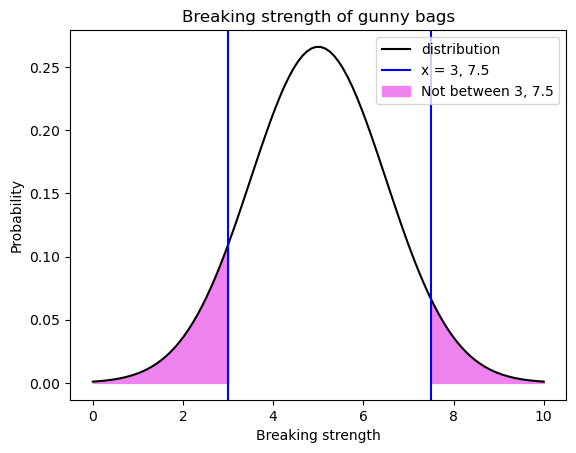

In [9]:
plt.plot(density["x"], density["pdf"],label='distribution',c='black') # plot the pdf of the normal distribution
plt.axvline(x=3, c="b")
plt.axvline(x=7.5, c="b",label='x = 3, 7.5')
x1=np.linspace(0, 3, 20)
x2=np.linspace(7.5, 10, 20)
plt.fill_between(x1, stats.norm.pdf(x1, mu, sigma), color="violet",label='Not between 3, 7.5')
plt.fill_between(x2, stats.norm.pdf(x2, mu, sigma), color="violet")
plt.xlabel("Breaking strength")
plt.ylabel("Probability") # set the y-axis label
plt.title("Breaking strength of gunny bags") # set the title
plt.legend()
# plt.savefig('2_4.png',dpi=400)
plt.show() # display the plot

In [10]:
prob_not_btn =1-(stats.norm.cdf(7.5, mu, sigma)-stats.norm.cdf(3, mu, sigma)) 
print(
    "proportion of the gunny bags which have a breaking strength not between 3 and 7.5 kg per sq cm:",
    round(prob_not_btn*100, 3),'%'
)

proportion of the gunny bags which have a breaking strength not between 3 and 7.5 kg per sq cm: 13.9 %


<h2 style="text-align:center; color:white; padding:10pt; background-color:teal">Zingaro printing company case study</h2>

<b>Context</b>
<p>Zingaro stone printing is a company that specializes in printing images or patterns on polished or unpolished stones. However, for the optimum level of printing of the image, the stone surface has to have a Brinell's hardness index of at least 150. Recently, Zingaro has received a batch of polished and unpolished stones from its clients.

In [11]:
# import data set
df=pd.read_csv('Zingaro_Company.csv')


In [12]:
df.head()

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unpolished            75 non-null     float64
 1   Treated and Polished  75 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unpolished,75.0,134.110527,33.041804,48.406838,115.329753,135.597121,158.215098,200.161313
Treated and Polished,75.0,147.788117,15.587355,107.524167,138.268300,145.721322,157.373318,192.272856


<b>Univariate analysis</b>

In [15]:
# Is null value / missing value
print(df['Unpolished '].isnull().sum())
print(df['Treated and Polished'].isnull().sum())

0
0


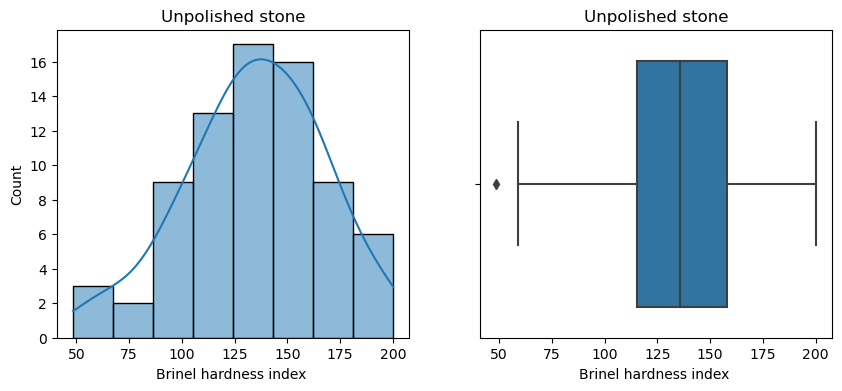

In [16]:
# let's check the distribution
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.title('Unpolished stone')
plt.xlabel('Brinel hardness index ')
sns.histplot(data=df,x='Unpolished ',kde=True)
plt.subplot(1,2,2)
plt.title('Unpolished stone')
sns.boxplot(data=df,x='Unpolished ')
plt.xlabel('Brinel hardness index ')
plt.show();

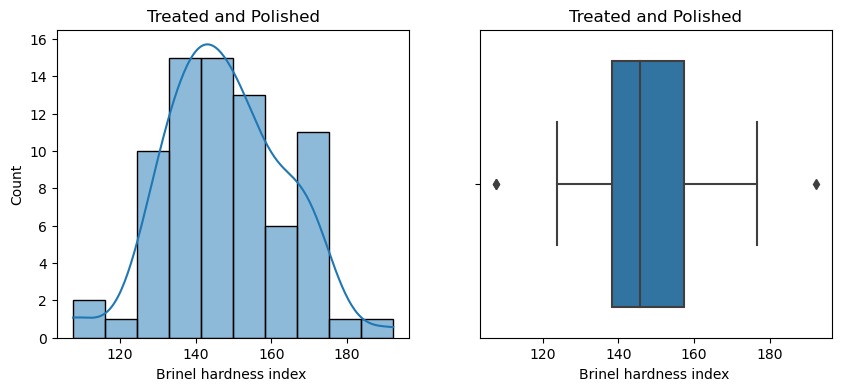

In [17]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.title('Treated and Polished')
sns.histplot(data=df,x='Treated and Polished',kde=True)
plt.xlabel('Brinel hardness index ')
plt.subplot(1,2,2)
plt.title('Treated and Polished')
sns.boxplot(data=df,x='Treated and Polished')
plt.xlabel('Brinel hardness index ')
plt.show();

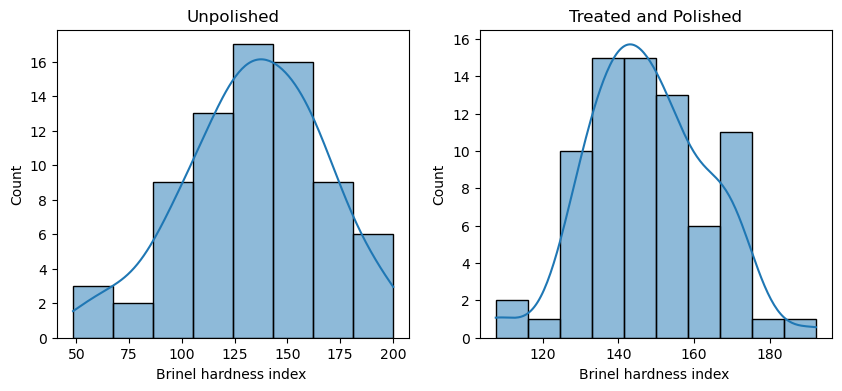

In [18]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.title('Unpolished')
sns.histplot(data=df,x='Unpolished ',kde=True)
plt.xlabel('Brinel hardness index ')
plt.subplot(1,2,2)
plt.title('Treated and Polished')
sns.histplot(data=df,x='Treated and Polished',kde=True)
plt.xlabel('Brinel hardness index ')
# plt.savefig('stone_hardness_distribution.png',dpi=400)
plt.show();

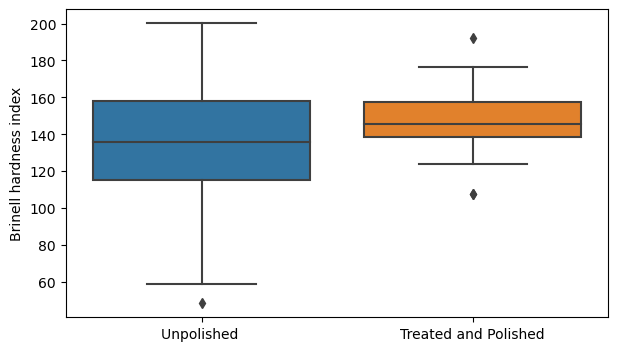

In [19]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df)
plt.ylabel('Brinell hardness index')
# plt.savefig('stone_hardness.png',dpi=400)
plt.show()

<b>3.1 Zingaro has reason to believe that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?</b>

<p>For the stones to be suitable for printing the hardness index must be atleast 150. we need to statistically check whether on average Unpolished stones have sufficient hardness level.
    <br>
    <ul>
        <li><b>Null Hypothesis - $H_0$</b> : Mean hardness level of Unploished stones is 150. $\mu$ $\leq$150.</li>
        <li><b>Alternate Hypothesis - $H_a$ : $\mu$ $\gt$ 150 </b></li>
        </ul>

In [20]:
from scipy.stats import ttest_1samp

# calculate the test statistic and p-value
test_stat, p_value = ttest_1samp(df['Unpolished '], popmean = 150, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.9999582871300258


Null hypothesis not rejected. We conclude that Unpolished stones have mean hardness level below 150

<b>3.2 Is the mean hardness of the polished and unpolished stones the same?</b>

  <ul>
        <li><b>Null Hypothesis - $H_0$</b> : Mean hardness level of Polished stones is same as Unpolished stones. $\mu_{unpolished} = \mu_{polished}$ </li>
        <li><b>Alternate Hypothesis - $H_a$ : $\mu_{unpolished} > \mu_{polished}$ </b></li>
        </ul>

In [21]:
from scipy.stats import ttest_ind
# find the p-value
test_stat, p_value = ttest_ind(df['Treated and Polished'],df['Unpolished '], equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.000794189647792153


Null hypothesis rejected. Unpolished stones have better hardness level.

<br>
<br>
    <h2 style="text-align:center; color:white; padding:10pt; background-color:teal">Dental Implants case study:<h2>

In [64]:
# import dataset
data=pd.read_excel('Dental+Hardness+data.xlsx')
data.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dentist   90 non-null     int64
 1   Method    90 non-null     int64
 2   Alloy     90 non-null     int64
 3   Temp      90 non-null     int64
 4   Response  90 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


In [66]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Dentist,90.0,3.000000,1.422136,1.0,2.0,3.0,4.0,5.0
Method,90.0,2.000000,0.821071,1.0,1.0,2.0,3.0,3.0
Alloy,90.0,1.500000,0.502801,1.0,1.0,1.5,2.0,2.0
Temp,90.0,1600.000000,82.107083,1500.0,1500.0,1600.0,1700.0,1700.0
Response,90.0,741.777778,145.767845,289.0,698.0,767.0,824.0,1115.0


In [25]:
data['Dentist'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [26]:
data['Dentist'].value_counts()

1    18
2    18
3    18
4    18
5    18
Name: Dentist, dtype: int64

In [27]:
data['Method'].unique()

array([1, 2, 3], dtype=int64)

In [28]:
data['Method'].value_counts()

1    30
2    30
3    30
Name: Method, dtype: int64

In [29]:
data['Alloy'].unique()

array([1, 2], dtype=int64)

In [30]:
data['Alloy'].value_counts()

1    45
2    45
Name: Alloy, dtype: int64

In [31]:
data['Temp'].unique()

array([1500, 1600, 1700], dtype=int64)

In [32]:
data['Temp'].value_counts()

1500    30
1600    30
1700    30
Name: Temp, dtype: int64

There are no missing values in the data set which would require treatment  or cleaning. we can proceed to analysis.

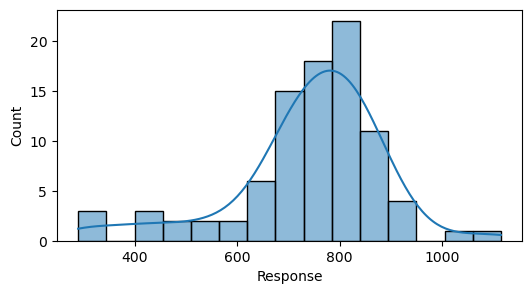

In [33]:
# let's check the distribution of numerical Response variables
plt.figure(figsize=(6, 3))
sns.histplot(data=data,x='Response',kde=True)
plt.show();

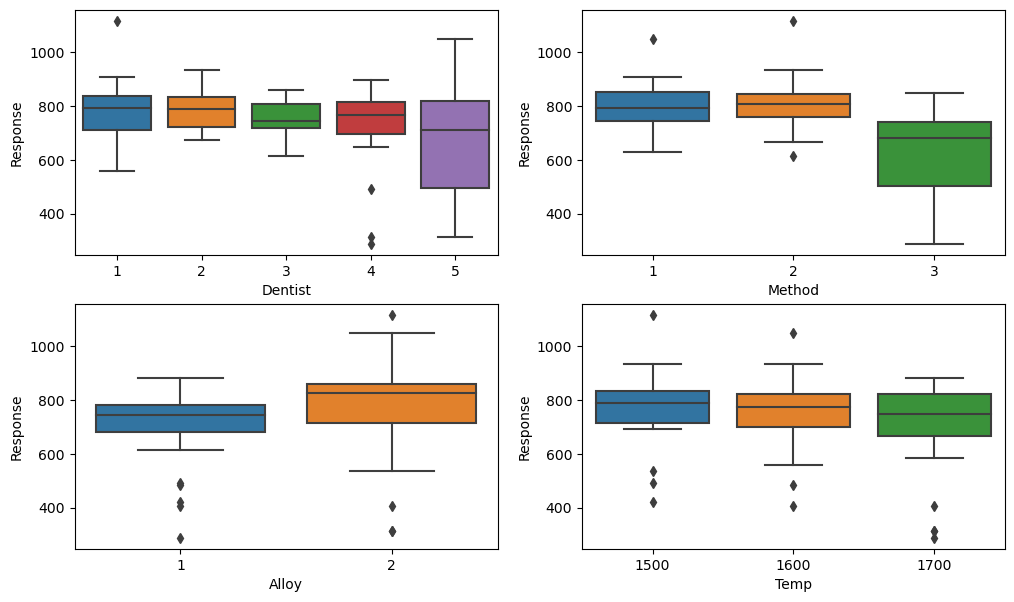

In [34]:
# lets check effect of categorigal variables on theses distributions
plt.figure(figsize=(12,7))
plt.subplot(2,2,1)
sns.boxplot(data=data,x='Dentist',y='Response')
plt.subplot(2,2,2)
sns.boxplot(data=data,x='Method',y='Response')
plt.subplot(2,2,3)
sns.boxplot(data=data,x='Alloy',y='Response')
plt.subplot(2,2,4)
sns.boxplot(data=data,x='Temp',y='Response')

plt.show()

<p style="text-align:center;font-size:Large"><b>4.1 How does the hardness of implants vary depending on dentists?</b>

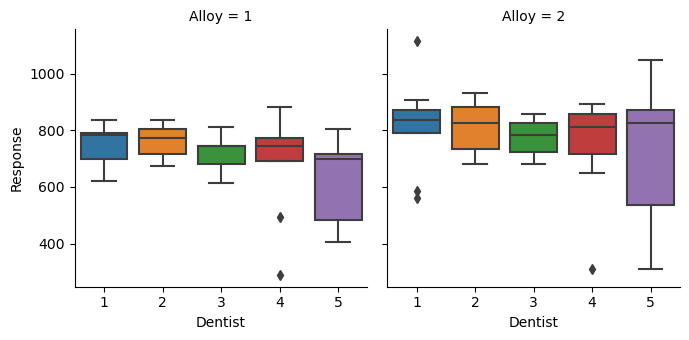

In [35]:
sns.catplot(data=data,x='Dentist',y='Response',col='Alloy',kind='box',height=3.5);
# plt.savefig('4_1.png',dpi=400)
plt.show()

<b>Alloy 1</b>

In [36]:
print('---------means----------')
print(data[data['Alloy']==1].groupby('Dentist')['Response'].mean())
print('---------standard deviations----------')
print(data[data['Alloy']==1].groupby('Dentist')['Response'].std())

---------means----------
Dentist
1    749.888889
2    761.222222
3    717.555556
4    681.111111
5    627.666667
Name: Response, dtype: float64
---------standard deviations----------
Dentist
1     72.954514
2     53.391895
3     64.569945
4    180.683732
5    149.867441
Name: Response, dtype: float64


We will now do the Shapiro-Wilk’s test for normality condition and Levene for test of equalty of variance on the response variable.

In [37]:
# Normality check 
w, p_value = stats.shapiro(data[data['Alloy']==1]['Response']) 
print('The p-value is', p_value)

The p-value is 1.1945070582441986e-05


In [38]:
# equality of variance check
statistic, p_value = stats.levene(data[(data['Alloy']==1) & (data['Dentist']==1)]['Response'],
                           data[(data['Alloy']==1) & (data['Dentist']==2)]['Response'],
                           data[(data['Alloy']==1) & (data['Dentist']==3)]['Response'],
                           data[(data['Alloy']==1) & (data['Dentist']==4)]['Response'],
                           data[(data['Alloy']==1) & (data['Dentist']==5)]['Response'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.2565537418543795


In [39]:
# let's carry out one-way Anova F-test
test_stat, p_value = stats.f_oneway(data[(data['Alloy']==1) & (data['Dentist']==1)]['Response'],
                           data[(data['Alloy']==1) & (data['Dentist']==2)]['Response'],
                           data[(data['Alloy']==1) & (data['Dentist']==3)]['Response'],
                           data[(data['Alloy']==1) & (data['Dentist']==4)]['Response'],
                           data[(data['Alloy']==1) & (data['Dentist']==5)]['Response'])
print('The p-value is ' + str(p_value))

The p-value is 0.11656712140267628


<b>Alloy 2</b>

In [40]:
print('---------means----------')
print(data[data['Alloy']==2].groupby('Dentist')['Response'].mean())
print('---------standard deviations----------')
print(data[data['Alloy']==2].groupby('Dentist')['Response'].std())

---------means----------
Dentist
1    816.222222
2    812.111111
3    779.666667
4    746.222222
5    726.111111
Name: Response, dtype: float64
---------standard deviations----------
Dentist
1    166.490824
2     91.833333
3     63.180298
4    180.153947
5    250.351475
Name: Response, dtype: float64


In [41]:
# Normality check 
w, p_value = stats.shapiro(data[data['Alloy']==2]['Response']) 
print('The p-value is', p_value)

The p-value is 0.00040293222991749644


In [42]:
# equality of variance check
statistic, p_value = stats.levene(data[(data['Alloy']==2) & (data['Dentist']==1)]['Response'],
                           data[(data['Alloy']==2) & (data['Dentist']==2)]['Response'],
                           data[(data['Alloy']==2) & (data['Dentist']==3)]['Response'],
                           data[(data['Alloy']==2) & (data['Dentist']==4)]['Response'],
                           data[(data['Alloy']==2) & (data['Dentist']==5)]['Response'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.23686777576324952


In [43]:
# let's carry out one-way Anova F-test
test_stat, p_value = stats.f_oneway(data[(data['Alloy']==2) & (data['Dentist']==1)]['Response'],
                           data[(data['Alloy']==2) & (data['Dentist']==2)]['Response'],
                           data[(data['Alloy']==2) & (data['Dentist']==3)]['Response'],
                           data[(data['Alloy']==2) & (data['Dentist']==4)]['Response'],
                           data[(data['Alloy']==2) & (data['Dentist']==5)]['Response'])
print('The p-value is ' + str(p_value))

The p-value is 0.7180309510793431


<p style="text-align:center;font-size:Large"><b>4.2 How does the hardness of implants vary depending on methods?</b>

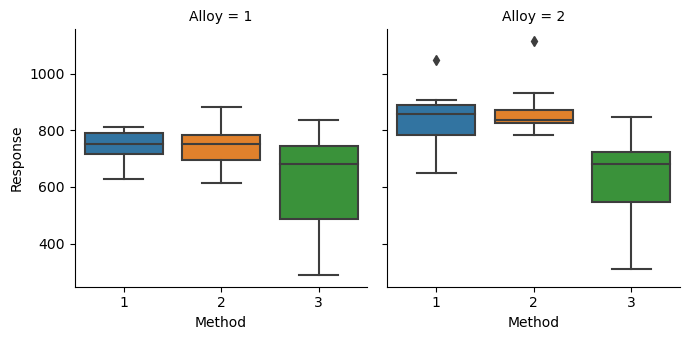

In [44]:
sns.catplot(data=data,x='Method',y='Response',col='Alloy',kind='box',height=3.5);
# plt.savefig('4_2.png',dpi=400)
plt.show()

<b>Alloy 1</b>

In [45]:
print('---------means----------')
print(data[data['Alloy']==1].groupby('Method')['Response'].mean())
print('---------standard deviations----------')
print(data[data['Alloy']==1].groupby('Method')['Response'].std())

---------means----------
Method
1    751.133333
2    745.000000
3    626.333333
Name: Response, dtype: float64
---------standard deviations----------
Method
1     52.370748
2     68.903659
3    167.532371
Name: Response, dtype: float64


In [46]:
# Normality check 
w, p_value = stats.shapiro(data[data['Alloy']==1]['Response']) 
print('The p-value is', p_value)

The p-value is 1.1945070582441986e-05


In [47]:
# equality of variance check
statistic, p_value = stats.levene(data[(data['Alloy']==1) & (data['Method']==1)]['Response'],
                           data[(data['Alloy']==1) & (data['Method']==2)]['Response'],
                           data[(data['Alloy']==1) & (data['Method']==3)]['Response'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.0034160381460233975


In [48]:
# let's carry out one-way Anova F-test
test_stat, p_value = stats.f_oneway(data[(data['Alloy']==1) & (data['Method']==1)]['Response'],
                           data[(data['Alloy']==1) & (data['Method']==2)]['Response'],
                           data[(data['Alloy']==1) & (data['Method']==3)]['Response'])
print('The p-value is ' + str(p_value))

The p-value is 0.004163412167505543


In [49]:
#let's  perform multiple pairwise comparison (Tukey HSD) to find out which one differ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
m_comp = pairwise_tukeyhsd(endog = data[data['Alloy']==1]['Response'], 
                                       groups = data[data['Alloy']==1]['Method'], alpha = 0.05)
print(m_comp)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     1      2   -6.1333  0.987  -102.714  90.4473  False
     1      3    -124.8 0.0085 -221.3807 -28.2193   True
     2      3 -118.6667 0.0128 -215.2473  -22.086   True
--------------------------------------------------------


<b>Alloy 2</b>

In [50]:
print('---------means----------')
print(data[data['Alloy']==2].groupby('Method')['Response'].mean())
print('---------standard deviations----------')
print(data[data['Alloy']==2].groupby('Method')['Response'].std())

---------means----------
Method
1    836.666667
2    863.666667
3    627.866667
Name: Response, dtype: float64
---------standard deviations----------
Method
1     93.953383
2     81.901218
3    173.590597
Name: Response, dtype: float64


In [51]:
w, p_value = stats.shapiro(data[data['Alloy']==2]['Response']) 
print('The p-value is', p_value)

The p-value is 0.00040293222991749644


In [52]:
# equality of variance check
statistic, p_value = stats.levene(data[(data['Alloy']==2) & (data['Method']==1)]['Response'],
                           data[(data['Alloy']==2) & (data['Method']==2)]['Response'],
                           data[(data['Alloy']==2) & (data['Method']==3)]['Response'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.04469269939158668


In [53]:
# let's carry out one-way Anova F-test
test_stat, p_value = stats.f_oneway(data[(data['Alloy']==2) & (data['Method']==1)]['Response'],
                           data[(data['Alloy']==2) & (data['Method']==2)]['Response'],
                           data[(data['Alloy']==2) & (data['Method']==3)]['Response'])
print('The p-value is ' + str(p_value))

The p-value is 5.415871051443187e-06


In [54]:
#let's  perform multiple pairwise comparison (Tukey HSD) to find out which one differ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
m_comp = pairwise_tukeyhsd(endog = data[data['Alloy']==2]['Response'], 
                                       groups = data[data['Alloy']==2]['Method'], alpha = 0.05)
print(m_comp)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
     1      2     27.0 0.8212  -82.4546  136.4546  False
     1      3   -208.8 0.0001 -318.2546  -99.3454   True
     2      3   -235.8    0.0 -345.2546 -126.3454   True
--------------------------------------------------------


<p style="text-align:center;font-size:Large"><b>4.3 What is the interaction effect between the dentist and method on the hardness of dental implants for each type of alloy?</b></p>
    
<p>We will produce the interaction point plots</p>

<b>Alloy 1</b>

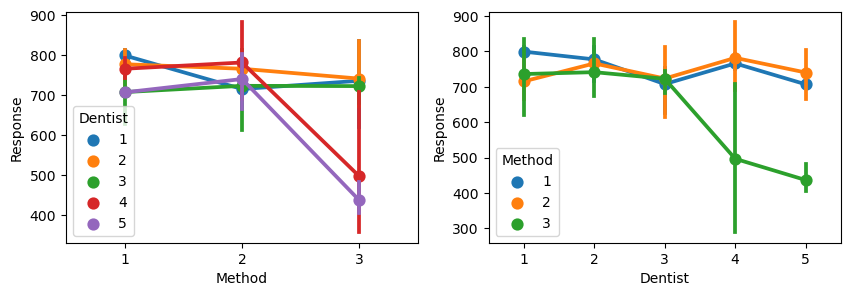

In [55]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.pointplot(data=data[data['Alloy']==1],x='Method',y='Response',hue='Dentist')
plt.subplot(1,2,2)
sns.pointplot(data=data[data['Alloy']==1],x='Dentist',y='Response',hue='Method')
plt.show()

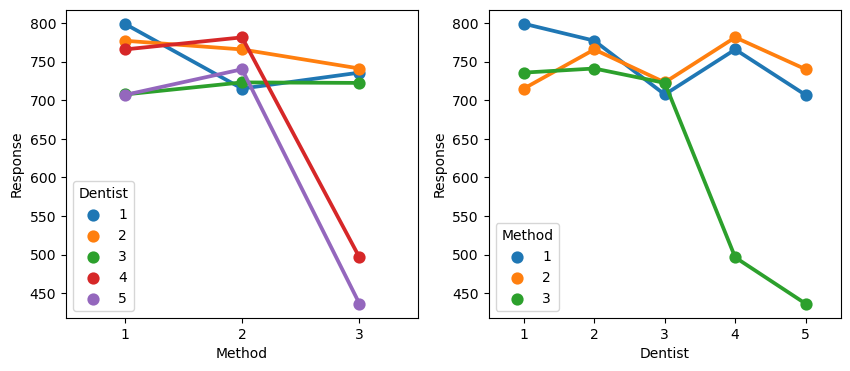

In [56]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.pointplot(data=data[data['Alloy']==1],x='Method',y='Response',hue='Dentist',errorbar=None)
plt.subplot(1,2,2)
sns.pointplot(data=data[data['Alloy']==1],x='Dentist',y='Response',hue='Method',errorbar=None)
# plt.savefig('4_3_alloy1.png',dpi=400)
plt.show()

<b>Alloy 2</b>

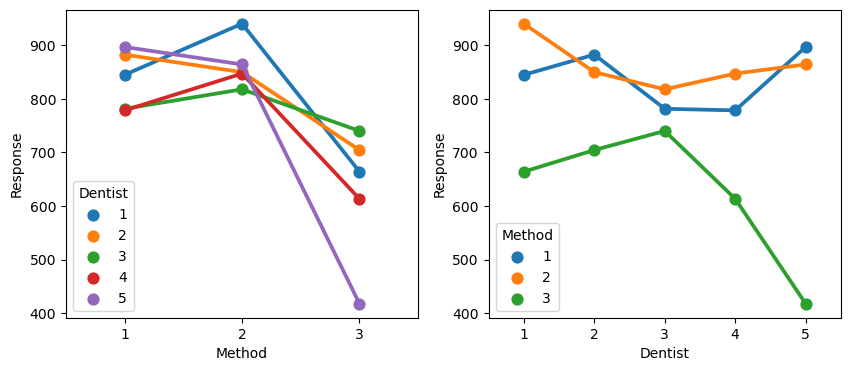

In [57]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.pointplot(data=data[data['Alloy']==2],x='Method',y='Response',hue='Dentist',errorbar=None)
plt.subplot(1,2,2)
sns.pointplot(data=data[data['Alloy']==2],x='Dentist',y='Response',hue='Method',errorbar=None)
# plt.savefig('4_3_alloy2.png',dpi=400)
plt.show()

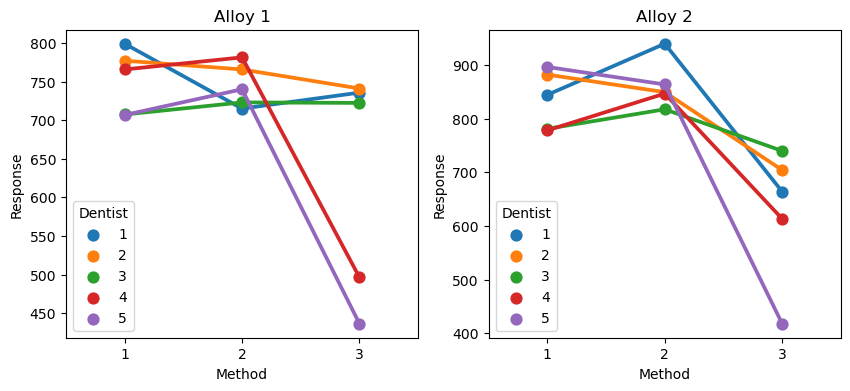

In [229]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.pointplot(data=data[data['Alloy']==1],x='Method',y='Response',hue='Dentist',errorbar=None)
plt.title('Alloy 1')
plt.subplot(1,2,2)
sns.pointplot(data=data[data['Alloy']==2],x='Method',y='Response',hue='Dentist',errorbar=None)
plt.title('Alloy 2')
# plt.savefig('interaction_plot.png',dpi=400)
plt.show()

<br><p style="text-align:center;font-size:Large"><b> 4.4 How does the hardness of implants vary depending on dentists and methods together?</b>
 <p>Two way ANOVA test</p>   
<ul>
<li><p>Hypothesis for main effect of Method factor</p>
<ul>
<li><p>Null Hypothesis <span class="math inline"><em>H</em><sub>0</sub></span> : Method used for implant doe not have any effect on Response level.</p></li>
<li><p>Alternate <span class="math inline"><em>H</em><sub><em>a</em></sub></span> : Method used for implant does have effect on Response level.</p></li>
</ul></li>
<li><p>Hypothesis for main effect of Dentist factor</p>
<ul>
<li><p>Null Hypothesis <span class="math inline"><em>H</em><sub>0</sub></span> : Different dentist get same result on Response level.</p></li>
<li><p>Alternate <span class="math inline"><em>H</em><sub><em>a</em></sub></span> : Different dentist get variable result on Response level.</p></li>
</ul></li>
<li><p>Hypothesis for interaction effect</p>
<ul>
<li><p>Null Hypothesis <span class="math inline"><em>H</em><sub>0</sub></span> : There is no interaction between Method and Dentist on Response level.</p></li>
<li><p>Alternate <span class="math inline"><em>H</em><sub><em>a</em></sub></span> : There is an interaction between Method and Dentist on Response level.</p></li>
</ul></li>
</ul>

<p>Significance level - 0.05</p>

<b>Alloy 1</b>

In [58]:
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

data.Dentist=pd.Categorical(data.Dentist)
data.Method=pd.Categorical(data.Method)


formula = 'Response ~ C(Dentist) + C(Method)'
model = ols(formula, data[data['Alloy']==1]).fit()
aov_table = anova_lm(model)
print(aov_table)

              df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  106683.688889  26670.922222  2.591255  0.051875
C(Method)    2.0  148472.177778  74236.088889  7.212522  0.002211
Residual    38.0  391121.377778  10292.667836       NaN       NaN


In [59]:
data[data['Alloy']==1].head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
6,1,2,1,1500,782
7,1,2,1,1600,698


In [60]:
formula = 'Response ~ C(Dentist) + C(Method) + C(Method):C(Dentist)'
model = ols(formula, data[data['Alloy']==1]).fit()
aov_table = anova_lm(model)
print(aov_table)

                        df         sum_sq       mean_sq          F    PR(>F)
C(Dentist)             4.0  106683.688889  26670.922222   3.899638  0.011484
C(Method)              2.0  148472.177778  74236.088889  10.854287  0.000284
C(Method):C(Dentist)   8.0  185941.377778  23242.672222   3.398383  0.006793
Residual              30.0  205180.000000   6839.333333        NaN       NaN


<p>Method factor : Null hypothesis rejected</p>
<p>Dentist factor : Null hypothesis not rejected</p>
<p>Interaction : Null hypothesis rejected. There is interaction between Dentist and method </p>

<b>Alloy 2</b>

In [61]:
formula = 'Response ~ C(Dentist) + C(Method)'
model = ols(formula, data[data['Alloy']==2]).fit()
aov_table = anova_lm(model)
print(aov_table)

              df         sum_sq        mean_sq          F    PR(>F)
C(Dentist)   4.0   56797.911111   14199.477778   0.926215  0.458933
C(Method)    2.0  499640.400000  249820.200000  16.295479  0.000008
Residual    38.0  582564.488889   15330.644444        NaN       NaN


In [62]:
formula = 'Response ~ C(Dentist) + C(Method) + C(Method):C(Dentist)'
model = ols(formula, data[data['Alloy']==2]).fit()
aov_table = anova_lm(model)
print(aov_table)

                        df         sum_sq        mean_sq          F    PR(>F)
C(Dentist)             4.0   56797.911111   14199.477778   1.106152  0.371833
C(Method)              2.0  499640.400000  249820.200000  19.461218  0.000004
C(Method):C(Dentist)   8.0  197459.822222   24682.477778   1.922787  0.093234
Residual              30.0  385104.666667   12836.822222        NaN       NaN


<p>Method factor : Null hypothesis rejected</p>
<p>Dentist factor : Null hypothesis not rejected</p>
<p>Interaction : Null hypothesis not rejected with respect to 0.05 significance level. There is interaction between Dentist and method with 90.7 % chance</p>